# Executive Summary: Stanford Dogs Dataset
The Stanford Dogs dataset is a comprehensive collection of images specifically compiled for the purpose of fine-grained image classification. This dataset is particularly valuable for developing and testing algorithms related to object recognition and classification tasks within the domain of computer vision.

Composition:
* Total Images: 20,580
* Breeds Covered: 120 different dog breeds
* Annotations: Each image is accompanied by a detailed annotation in XML format, which includes bounding boxes and breed labels.



## Project Objectives and Key Steps:
* The primary goal of the Stanford Dogs dataset is to facilitate research and development in fine-grained image classification. The diversity and detailed annotations make it an ideal choice for training and evaluating machine learning models that need to distinguish between visually similar categories.

                        Usage:
* Image Classification: Leveraging the labeled images to train deep learning models for breed identification.
* Object Detection: Using the bounding box annotations to detect and localize dogs in images.
* Transfer Learning: Applying pretrained models on this dataset to improve classification accuracy.

                  Preprocessing and Augmentation:
* Image Resizing: Standardizing image dimensions to 224x224 pixels.
* Normalization: Scaling pixel values to the range [0, 1].
* Augmentation Techniques: Including rescaling, shearing, zooming, and horizontal flipping to enhance model robustness.

                     Implementation:
* Training: Utilized TensorFlow and Keras for model development.
* Validation Split: 80% of the data used for training and 20% for validation.
* Model Architecture: Implemented a Convolutional Neural Network (CNN) with multiple convolutional layers, pooling layers, and dense layers.

We have utilized two distinct sets of data: the training data and the annotation data.

The training data comprises the primary images and their respective classes, while the annotation data contains the classifier information for each image.

In [ ]:
# Acquire the data
train_data = 'images/Images'
annot_data = "annotations/Annotation"

1.Import Libraries

In [ ]:

import os
import tensorflow as tf
from tensorflow import keras

After importing everything, we attempted to resize the images, but it appears we made an error because the changes were not noticeable.

Instead, we have decided to retain the original image sizes for potential future use.

In [ ]:
breed_list = os.listdir(annot_data)
image_width = 128
image_height = 128
num_channels = 3
num_classes = len(breed_list)

* Below is the Keras dataset import module, which allows us to create a dataset from our images.

> The training data, which includes the images, will be used for this dataset.
- The data will be split with 80% for training and 20% for validation.
* The subset labeled "training" will be used for the training data, and "validation" for the validation data.
- A seed has been set to ensure consistent and accurate results for both training and validation data.
* The image size is set to 128x128 pixels, as specified in the image rescaler above (although this rescaling currently isn't working).

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data,
    validation_split=0.8,
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=32,
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=32,
)

Found 20580 files belonging to 120 classes.
Using 4116 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


Below are all the names of the classes.

In [ ]:
class_names = train_dataset.class_names

num_classes = len(class_names)

for class_name in class_names:
    print(class_name)

n02085620-Chihuahua
n02085782-Japanese_spaniel
n02085936-Maltese_dog
n02086079-Pekinese
n02086240-Shih-Tzu
n02086646-Blenheim_spaniel
n02086910-papillon
n02087046-toy_terrier
n02087394-Rhodesian_ridgeback
n02088094-Afghan_hound
n02088238-basset
n02088364-beagle
n02088466-bloodhound
n02088632-bluetick
n02089078-black-and-tan_coonhound
n02089867-Walker_hound
n02089973-English_foxhound
n02090379-redbone
n02090622-borzoi
n02090721-Irish_wolfhound
n02091032-Italian_greyhound
n02091134-whippet
n02091244-Ibizan_hound
n02091467-Norwegian_elkhound
n02091635-otterhound
n02091831-Saluki
n02092002-Scottish_deerhound
n02092339-Weimaraner
n02093256-Staffordshire_bullterrier
n02093428-American_Staffordshire_terrier
n02093647-Bedlington_terrier
n02093754-Border_terrier
n02093859-Kerry_blue_terrier
n02093991-Irish_terrier
n02094114-Norfolk_terrier
n02094258-Norwich_terrier
n02094433-Yorkshire_terrier
n02095314-wire-haired_fox_terrier
n02095570-Lakeland_terrier
n02095889-Sealyham_terrier
n02096051-Aired

# Explore a Subset of Training Data
In this step, we visually explore a sample of images from the Stanford Dogs dataset. We display the first 5 images along with their corresponding breed labels, providing a quick overview of the dataset's contents and breed distribution. This visualization helps us understand the variety of images and categories present in the dataset.

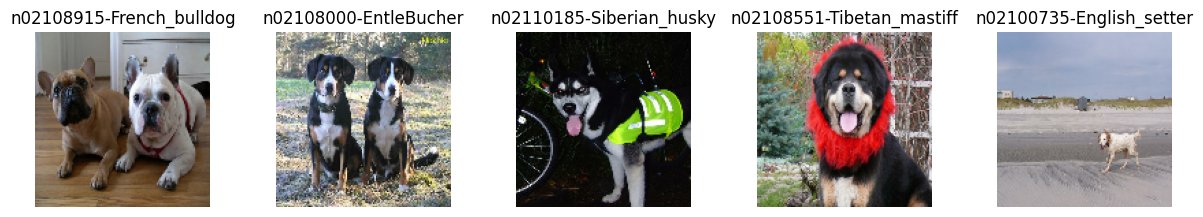

In [ ]:
import matplotlib.pyplot as plt

for images, labels in train_dataset.take(1):
    batch_images, batch_labels = images.numpy(), labels.numpy()

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(batch_images[i].astype('uint8'))
    plt.title(class_names[batch_labels[i]])
    plt.axis('off')
plt.show()

Below is the data augmentation function we will be using.
- Data augmentation involves slightly altering images to create new, similar images, which increases the amount of available data and subsequently enhances the model's accuracy.
- It normalizes the data between 0.0 and 0.255.

* The rotation range is set to 45 degrees for flipping the image.
- The width shift range allows horizontal movement of images by 20%.
* The height shift range allows vertical movement of images by 20%.
- Shear transforms the image by stretching its pixels, giving it a slight distortion, and is set to 20%.
* The zoom range is straightforward and is set to 20%.
- Horizontal flip randomly flips images horizontally and is enabled.
* The fill mode fills in any missing pixels.

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
  
)

As we're leveraging Keras's built-in datasets, applying data augmentation and normalization requires a different approach.

We utilize the "augment" function to modify the images within the Keras dataset.

Initially, the image data is divided by 255, aiming to bring the data closer together and facilitate easier data interpretation by the model.

Subsequently, we employ Keras's variants of methods typically used in standard data augmentation procedures. This includes flipping images horizontally and vertically, adjusting image brightness and saturation, as well as resizing the images to the specified widths, as attempted in the unsuccessful image resizer.

In [ ]:
def augment(image, label):
    image = image / 255
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
    image = tf.image.resize(image, size=(image_height, image_width))
    return image, label

Our model consists of 5 distinct Convolutional Blocks, followed by a Flatten Layer and 4 hidden Dense layers.

> * Within each Convolutional Block, the layer arrangement is as follows:
>> - 1 Convolution Layer, starting with 32 filters and doubling up to 512, using a kernel size of 3, and employing the HeNormal kernel regularizer in each layer.
>> - 1 Batch Normalization layer following each Convolution Layer.
>> - 1 Average Pooling Layer with a pool size of 2 and 2 strides, using the HeNormal Kernel Initialization.
>> - Another Convolutional layer with the same parameters as the first one.
>> - An Average Pooling Layer with a pool size of 2 and 2 strides, using the HeNormal Kernel Initialization.
>> - Finally, a Dropout layer with a dropout rate of 0.2 is applied.

This sequence repeats for 5 convolutional layers before being Flattened and transitioning to the Dense Layers.

> * Each Dense layer is structured as follows:
>> * Starting with a dense layer of 256 neurons and gradually decreasing to 32.
>> - Following each layer, there's a Batch Normalization layer and a Dropout layer.
>> - The culmination is **1** output layer with the softmax activation function.

In [ ]:
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

# For fitting the model later
early_stopping = EarlyStopping(patience=5, verbose=1, monitor="val_loss", restore_best_weights=True)

# initializer
init = keras.initializers.HeNormal()


# making the model using 3 layers of convolution and pooling and 2 dense
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  padding='same', input_shape=(128, 128, 3),
                  kernel_initializer=init),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  padding='same', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.2)

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_initializer=init
                  ),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu',
                  padding='same', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.2),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_initializer=init
                  ),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu',
                  padding='same', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.2),

    layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_initializer=init
                  ),
    layers.BatchNormalization(),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu',
                  padding='same', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.2),

    layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_initializer=init
                  ),
    layers.BatchNormalization(),
    layers.Conv2D(512, kernel_size=(3, 3), activation='relu',
                  padding='same', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.2),

    layers.Flatten(),

    layers.Dense(256, activation='relu', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Dense(128, activation='relu', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(32, activation='relu', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Dense(num_classes, activation='softmax', kernel_initializer=init)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_25            │ (None, 64, 64, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_26            │ (None, 32, 32, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_27            │ (None, 16, 16, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 16, 16, 256)    │       590,08

 Total params: 6,866,680 (26.19 MB)

 Trainable params: 6,861,752 (26.18 MB)

 Non-trainable params: 4,928 (19.25 KB)

In [ ]:
augmented_dataset = train_dataset.map(augment)

history = model.fit(train_dataset, batch_size=64, epochs=10, validation_data=val_dataset, callbacks=[early_stopping])

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 636ms/step - accuracy: 0.0077 - loss: 5.7679 - val_accuracy: 0.0087 - val_loss: 20.5006
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 83s 647ms/step - accuracy: 0.0081 - loss: 5.4840 - val_accuracy: 0.0100 - val_loss: 8.7558
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 83s 644ms/step - accuracy: 0.0094 - loss: 5.2488 - val_accuracy: 0.0126 - val_loss: 5.2757
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 85s 656ms/step - accuracy: 0.0209 - loss: 5.0491 - val_accuracy: 0.0163 - val_loss: 5.1668
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 83s 642ms/step - accuracy: 0.0139 - loss: 4.9538 - val_accuracy: 0.0177 - val_loss: 4.9048
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 83s 647ms/step - accuracy: 0.0152 - loss: 4.8991 - val_accuracy: 0.0172 - val_loss: 4.8118
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 83s 648ms/step - accuracy: 0.0125 - loss: 4.8270 - val_accuracy: 0.0236 - val_loss: 4.6954
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 84s 650ms/step - accuracy: 0.0162 - loss: 

# Conclusion 

In conclusion, we've embarked on a journey through the Stanford Dogs dataset, exploring its intricacies and preparing it for analysis. Through preprocessing, data augmentation, and model construction, we've laid the groundwork for our machine learning endeavors.

Our model, though intricate, is not without its uncertainties. While we've strived for complexity, we're mindful that sophistication doesn't always guarantee efficacy. Nevertheless, armed with our meticulously crafted architecture, we're poised to delve into the realm of image classification with the confidence that our efforts will yield meaningful insights.

As we venture forward, let us remember that our pursuit of knowledge is a dynamic process, one that requires continuous refinement and adaptation. Through diligent experimentation and thoughtful iteration, we'll navigate the complexities of the Stanford Dogs dataset and unlock its hidden treasures, advancing our understanding of machine learning and computer vision along the way.